In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [20]:
tokenizer = Tokenizer()

#data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
data = open('./irish_lyrics.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1

In [21]:
print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [22]:
input_sequences = []
for line in corpus:
    #print(line)
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [23]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding='pre'))
# 패딩을 앞에 해야, 추후에 맨 뒤의 단어를 라벨로 선정할 때 쉬움

In [24]:
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) #like one-hot encoding

In [25]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [26]:
max_sequence_len

16

In [27]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words, activation='softmax'))
adam= Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam , metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 100)           269000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_1 (Dense)              (None, 2690)              540690    
Total params: 970,490
Trainable params: 970,490
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
377/377 [==============================] - 13s 35ms/step - loss: 6.3132 - accuracy: 0.0871
Epoch 2/100
377/377 [==============================] - 13s 35ms/step - loss: 5.4795 - accuracy: 0.1298
Epoch 3/100
377/377 [==============================] - 13s 35ms/step - loss: 4.6231 - accuracy: 0.1818
Epoch 4/100
377/377 [==============================] - 13s 35ms/step - loss: 3.8036 - accuracy: 0.2542
Epoch 5/100
377/377 [==============================] - 13s 35ms/step - loss: 3.2269 - accuracy: 0.3316
Epoch 6/100
377/377 [==============================] - 13s 35ms/step - loss: 3.3413 - accuracy: 0.3321
Epoch 7/100
377/377 [==============================] - 16s 42ms/step - loss: 2.5009 - accuracy: 0.4384
Epoch 8/100
377/377 [==============================] - 13s 35ms/step - loss: 2.0023 - accuracy: 0.5278
Epoch 9/100
377/377 [==============================] - 15s 39ms/step - loss: 1.7491 - accuracy: 0.5837
Epoch 10/100
377/377 [==============================] - 13s 35ms/step - l

377/377 [==============================] - 11s 30ms/step - loss: 0.9922 - accuracy: 0.7458
Epoch 79/100
377/377 [==============================] - 9s 25ms/step - loss: 1.0140 - accuracy: 0.7387
Epoch 80/100
377/377 [==============================] - 10s 26ms/step - loss: 1.0085 - accuracy: 0.7405
Epoch 81/100
377/377 [==============================] - 11s 29ms/step - loss: 1.0259 - accuracy: 0.7381
Epoch 82/100
377/377 [==============================] - 11s 29ms/step - loss: 1.0035 - accuracy: 0.7463
Epoch 83/100
377/377 [==============================] - 11s 30ms/step - loss: 0.9249 - accuracy: 0.7606
Epoch 84/100
377/377 [==============================] - 10s 27ms/step - loss: 0.9147 - accuracy: 0.7707
Epoch 85/100
377/377 [==============================] - 10s 26ms/step - loss: 0.9717 - accuracy: 0.7550
Epoch 86/100
377/377 [==============================] - 9s 24ms/step - loss: 0.9149 - accuracy: 0.7645
Epoch 87/100
377/377 [==============================] - 9s 24ms/step - loss: 0.

In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

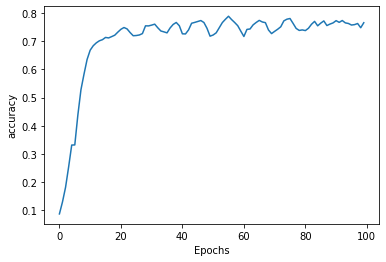

In [31]:
plot_graphs(history, 'accuracy')

In [34]:
#seed_text = "Laurence went to dublin"
seed_text = "I've got a bad feeling about this"
next_words = 100
    #predicted = model.predict_classes(token_list, verbose=0)
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)
print(len(seed_text))

I've got a bad feeling about this diggin for gold i lived in spancil hill and gone house in both loud and shrill my money he said you love as our love is gone easy now gone gone love in your heart is gone easy to gone and i must lingers in my love for love them can love on gone gone gone love in gone love is love and gone i love down on the rocky road to she love is right my love love in the smokey wind eyes on gone by night she might night love now gone love and gone bound well keep
488
